In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Loading the data
data = pd.read_csv('weather.csv')

In [4]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01/01/2012,0.0,12.8,5.0,4.7,drizzle
1,02/01/2012,10.9,10.6,2.8,4.5,rainy
2,03/01/2012,0.8,11.7,7.2,2.3,rainy
3,04/01/2012,20.3,12.2,5.6,4.7,rainy
4,05/01/2012,1.3,8.9,2.8,6.1,rainy


In [156]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather
1456,27/12/2015,8.6,4.4,1.7,2.9,rainy
1457,28/12/2015,1.5,5.0,1.7,1.3,rainy
1458,29/12/2015,0.0,7.2,0.6,2.6,windy
1459,30/12/2015,0.0,5.6,-1.0,3.4,suny
1460,31/12/2015,0.0,5.6,-2.1,3.5,suny


In [157]:
len(data)

1461

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [159]:
# Summary statistics
data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [160]:
# Check for missing values
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [5]:
# Convert 'date' to datetime
data['date'] = pd.to_datetime(data['date'])

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [15]:
#Separate Day, Month, Year

data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

In [16]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather,day,month,year
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,1,2012
1,2012-02-01,10.9,10.6,2.8,4.5,rainy,1,2,2012
2,2012-03-01,0.8,11.7,7.2,2.3,rainy,1,3,2012
3,2012-04-01,20.3,12.2,5.6,4.7,rainy,1,4,2012
4,2012-05-01,1.3,8.9,2.8,6.1,rainy,1,5,2012


In [165]:
data.tail()

,date,precipitation,temp_max,temp_min,wind,weather,day,month,year
1456,2015-12-27,8.6,4.4,1.7,2.9,rainy,27,12,2015
1457,2015-12-28,1.5,5.0,1.7,1.3,rainy,28,12,2015
1458,2015-12-29,0.0,7.2,0.6,2.6,windy,29,12,2015
1459,2015-12-30,0.0,5.6,-1.0,3.4,suny,30,12,2015
1460,2015-12-31,0.0,5.6,-2.1,3.5,suny,31,12,2015


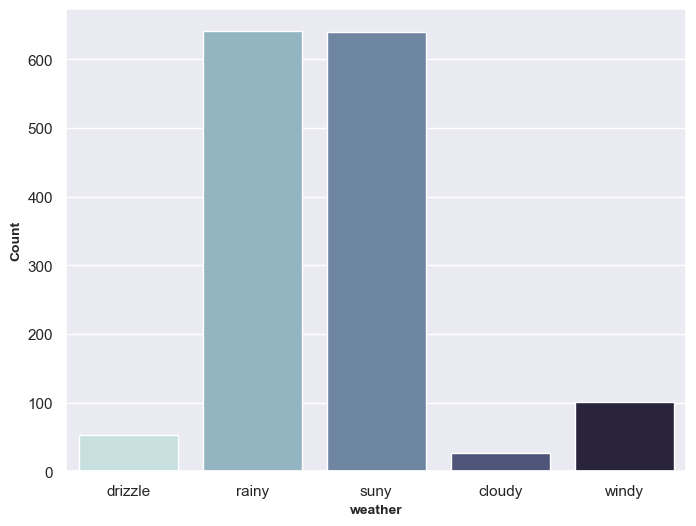

In [166]:
# Visualizing weather seasons
plt.figure(figsize=(8, 6))
sns.set_theme()
sns.countplot(x='weather', data=data, palette="ch:start=.2,rot=-.3")
plt.xlabel("weather", fontweight='bold', size=10)
plt.ylabel("Count", fontweight='bold', size=10)
plt.show()

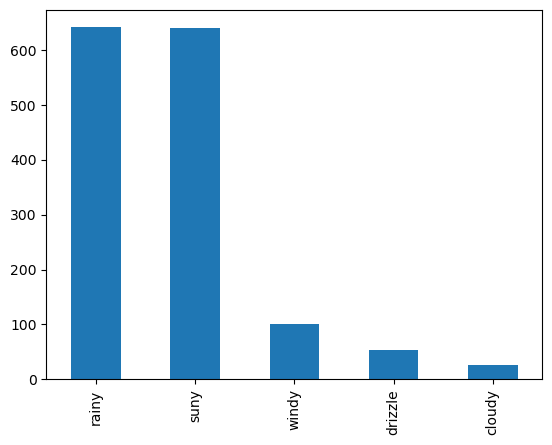

In [11]:
# Visualizing Weather
Weather_plot = data['weather'].value_counts().plot(kind='bar')

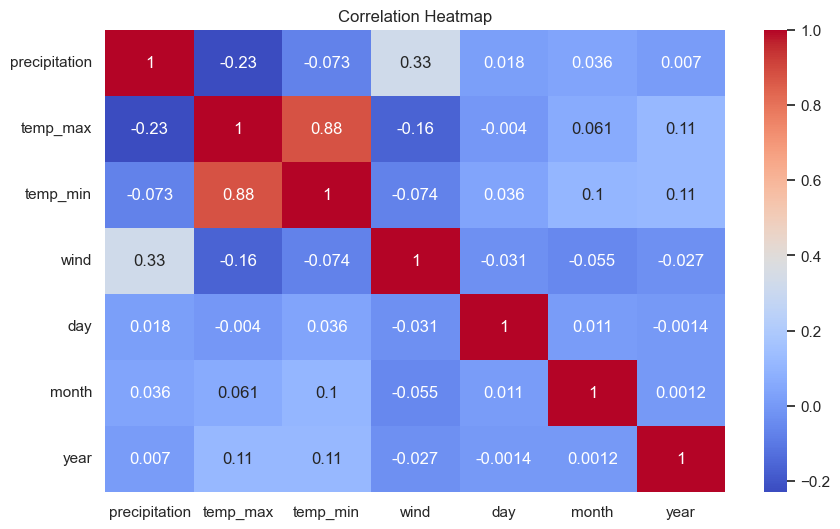

In [167]:
# Checking for Correlations
numeric_df = data.select_dtypes(exclude="object")
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

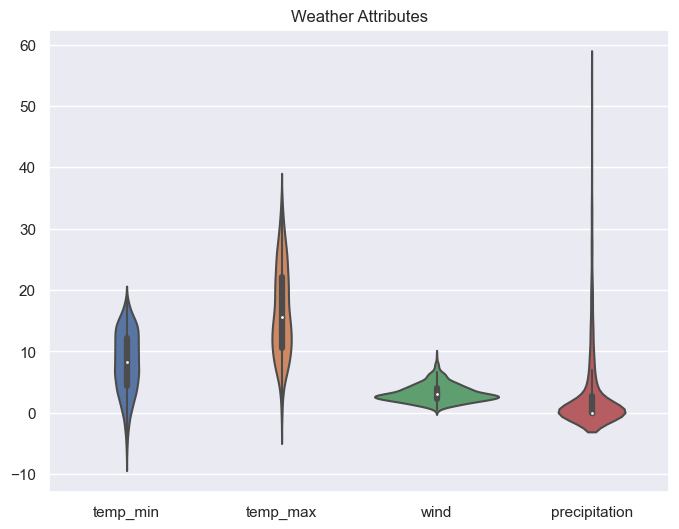

In [168]:
# Violin Plot on weather Attributes
plt.figure(figsize=(8, 6))
sns.violinplot(data=data[['temp_min','temp_max','wind','precipitation']])
plt.title('Weather Attributes')
plt.xticks()
plt.show()

In [169]:
# Assessing precipitation by month and Year
precipitation_table = data.groupby('month')['precipitation'].agg(['min', 'max', 'mean']).reset_index()
precipitation_table

,month,min,max,mean
0,1,0.0,27.7,3.050806
1,2,0.0,26.4,3.120354
2,3,0.0,55.9,3.964516
3,4,0.0,20.6,2.906667
4,5,0.0,46.7,2.472581
5,6,0.0,21.3,1.610000
6,7,0.0,39.1,1.805645
7,8,0.0,54.1,2.461290
8,9,0.0,43.4,2.282500
9,10,0.0,34.5,4.471774


In [170]:
precipitation_table = data.groupby('year')['precipitation'].agg(['min', 'max', 'mean']).reset_index()
precipitation_table

,year,min,max,mean
0,2012,0.0,54.1,3.349727
1,2013,0.0,43.4,2.268493
2,2014,0.0,46.7,3.377534
3,2015,0.0,55.9,3.121096


In [171]:
# Cross Variable Analysis

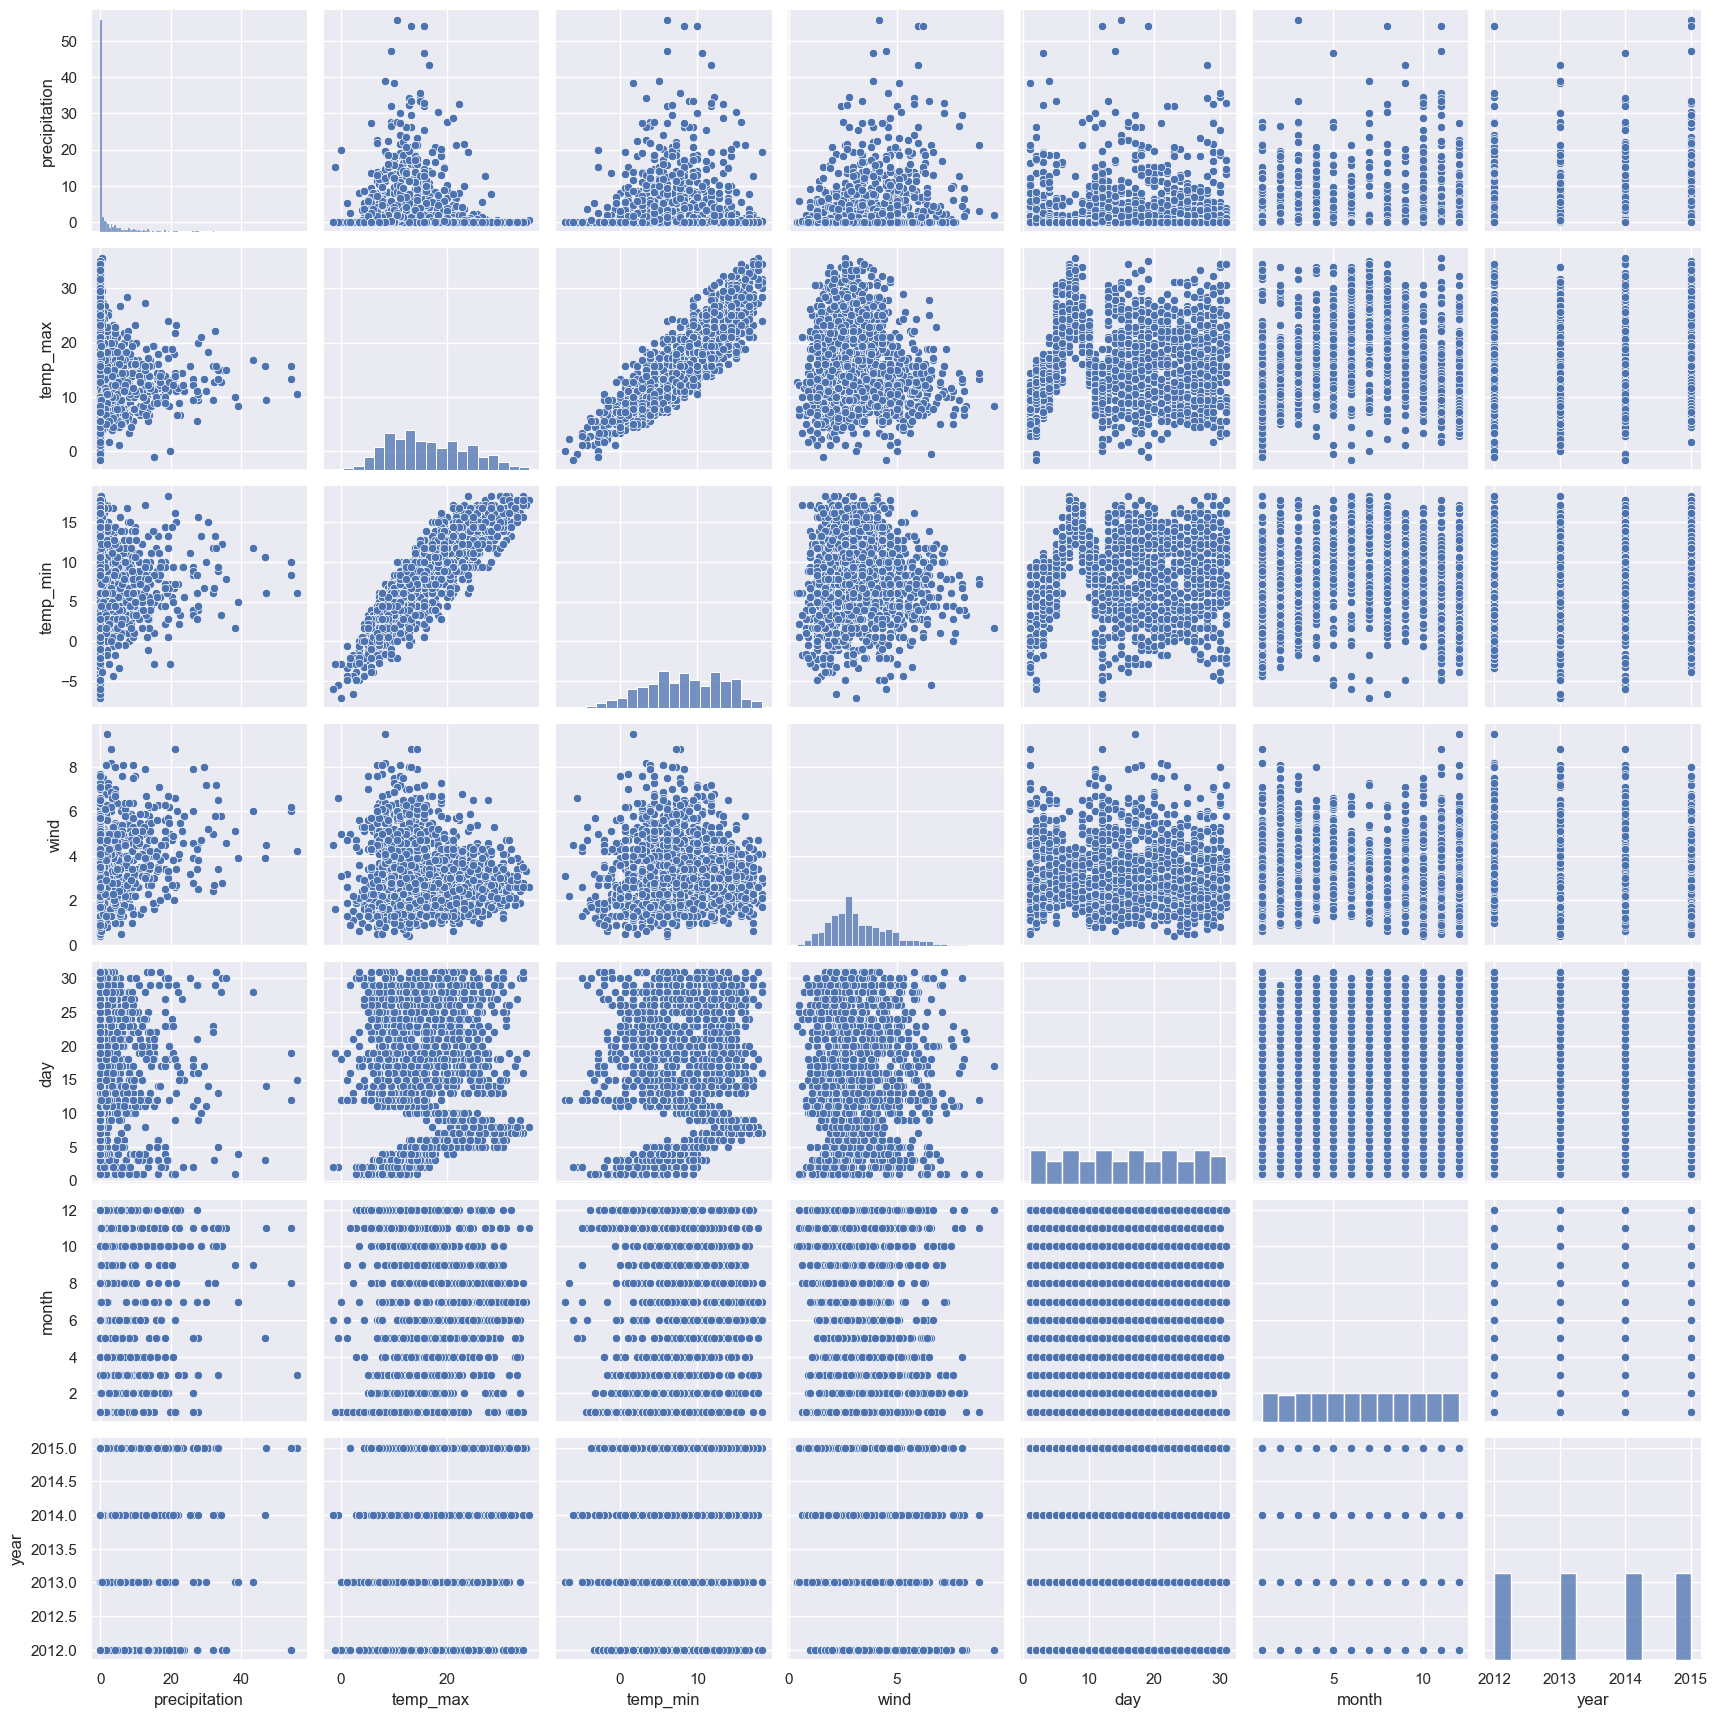

In [173]:
sns.pairplot(data)
plt.show()

<Axes: xlabel='wind', ylabel='precipitation'>

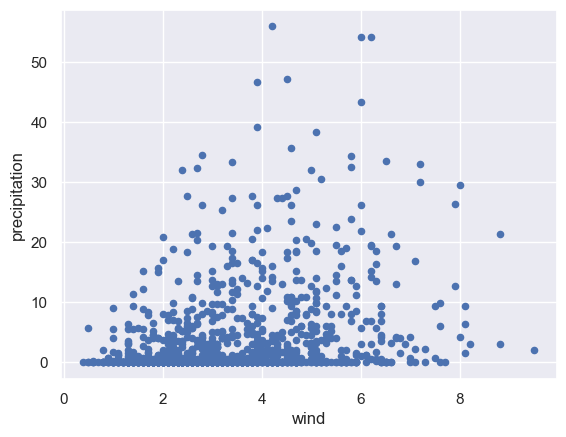

In [52]:
# Precipitation vs Wind
data.plot(kind = "scatter", x = 'wind', y = 'precipitation')

<Axes: xlabel='year', ylabel='precipitation'>

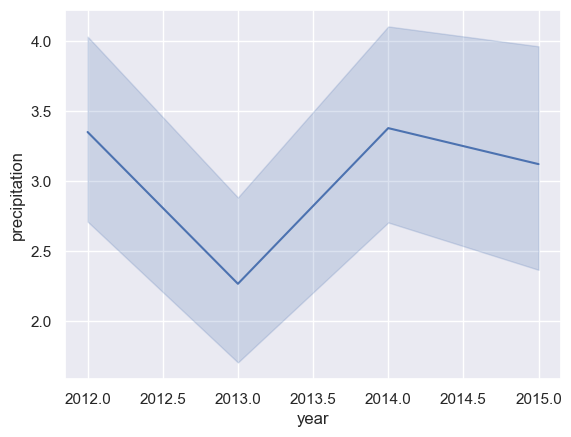

In [48]:
# Precipitation vs year
sns.lineplot(data = data, x = 'year', y = 'precipitation')

<Axes: xlabel='temp_max', ylabel='Count'>

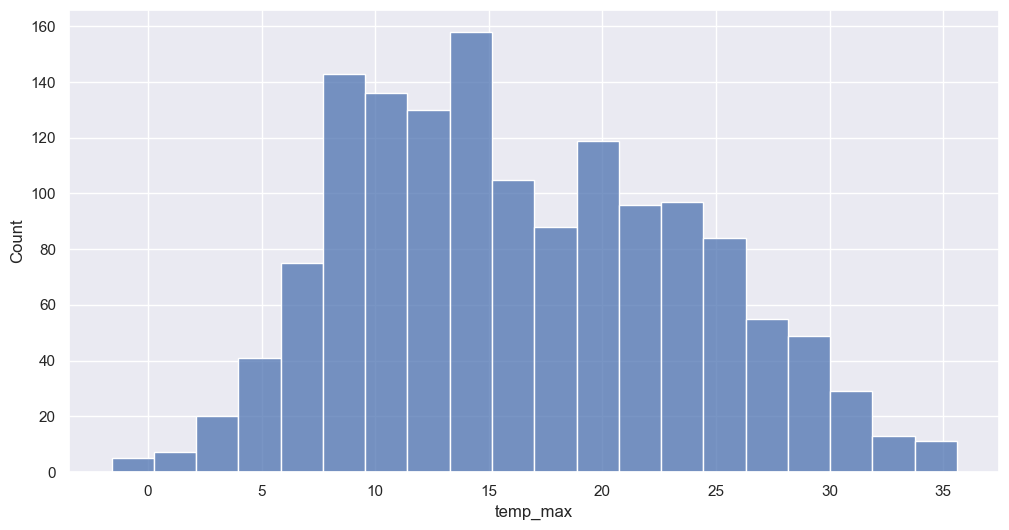

In [33]:
# Max Temps and PRECIPITATION
# MAX Plot
data[data['temp_max']==max(data.temp_max)]

plt.figure(figsize=(12,6))
sns.histplot(data=data,x=data.temp_max,bins=20)

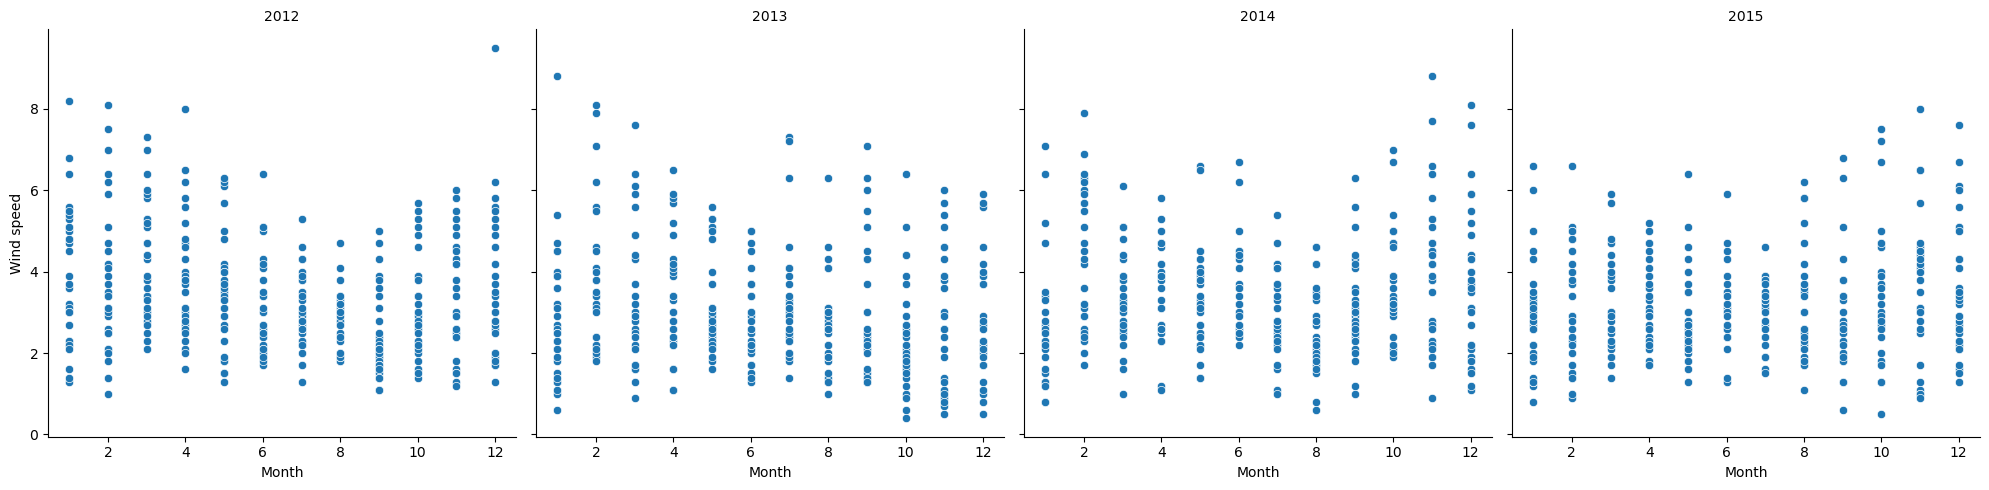

In [17]:
# Wind Speed Plot:
g = sns.FacetGrid(data, col='year', col_wrap=4, height=5)
g.map(sns.scatterplot, 'month', 'wind')
g.set_axis_labels('Month', 'Wind speed')
g.set_titles(col_template="{col_name}")
plt.show()

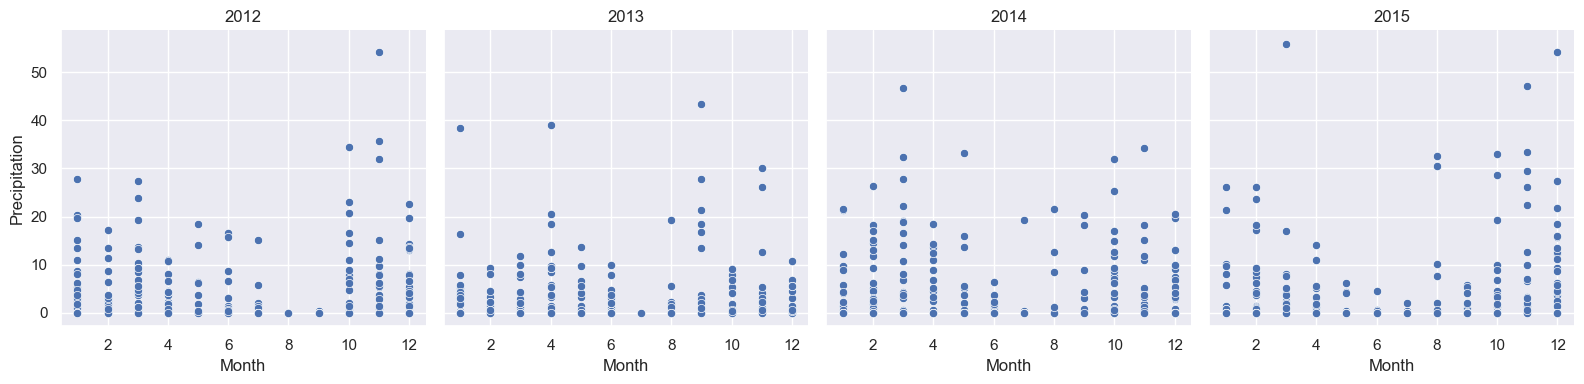

In [37]:
# Precipitation Plot:
g = sns.FacetGrid(data, col='year', col_wrap=4, height=4)
g.map(sns.scatterplot, 'month', 'precipitation')
g.set_axis_labels('Month', 'Precipitation')
g.set_titles(col_template="{col_name}")
plt.show()

In [ ]:
# Monthly and Annual weather plots

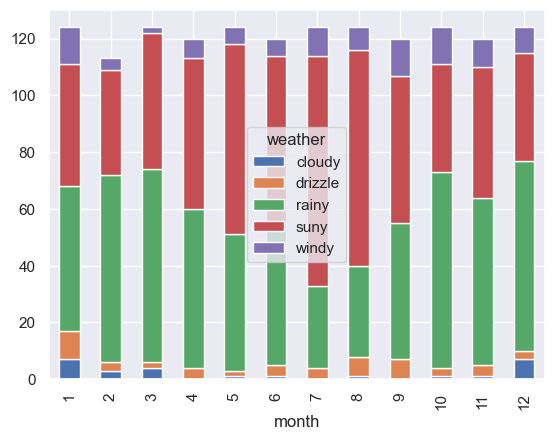

In [174]:
month_weather = data.groupby(['month'])['weather'].value_counts().unstack().plot(kind='bar',stacked = True)

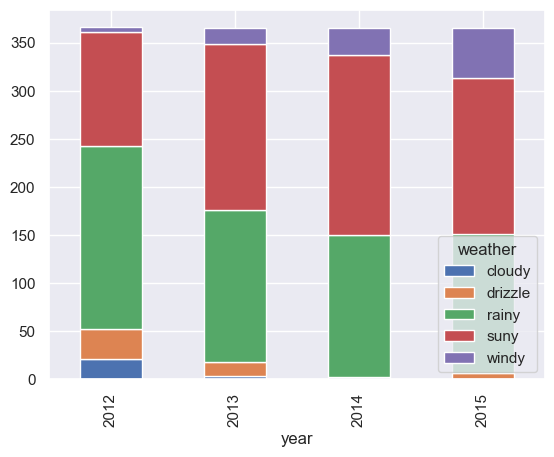

In [176]:
annual_weather = data.groupby(['year'])['weather'].value_counts().unstack().plot(kind='bar',stacked = True)

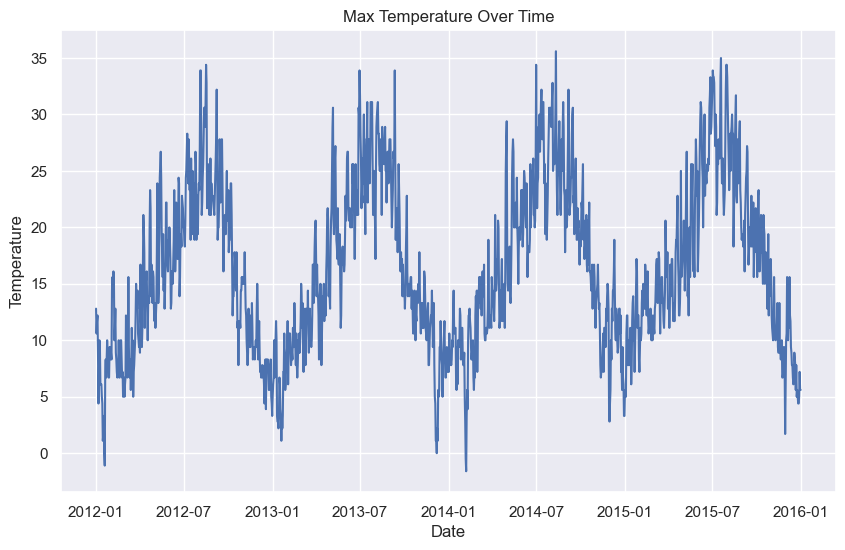

In [74]:
#Time Series Plot: (Max Temperature)

plt.figure(figsize=(10,6))
plt.plot(data['date'], data['temp_max'])
plt.title('Max Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')

plt.show()

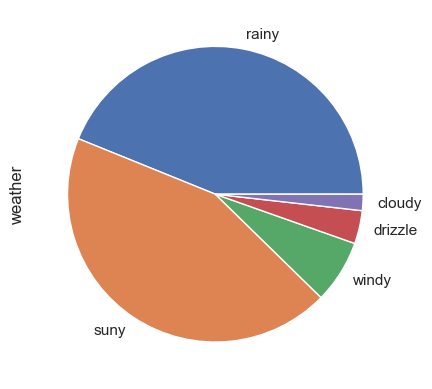

In [177]:
# Weather distribution plot
Weather_plot = data['weather'].value_counts().plot(kind='pie')

In [178]:
data['weather'].value_counts()/len(data)*100

rainy      43.874059
suny       43.805613
windy       6.913073
drizzle     3.627652
cloudy      1.779603
Name: weather, dtype: float64

In [ ]:
# Prediction Models:

In [20]:
data.columns

Index(['date', 'precipitation', 'temp_max', 'temp_min', 'wind', 'weather',
       'day', 'month', 'year'],
      dtype='object')

In [179]:
# Droping umwanted columns
data.drop('date',axis=1,inplace=True)
data.drop('day',axis=1,inplace=True)

In [180]:
data.head()

,precipitation,temp_max,temp_min,wind,weather,month,year
0,0.0,12.8,5.0,4.7,drizzle,1,2012
1,10.9,10.6,2.8,4.5,rainy,2,2012
2,0.8,11.7,7.2,2.3,rainy,3,2012
3,20.3,12.2,5.6,4.7,rainy,4,2012
4,1.3,8.9,2.8,6.1,rainy,5,2012


In [181]:
# Encoding Target Variable
from sklearn.preprocessing import LabelEncoder

In [182]:
labels = LabelEncoder()
#data['weather']=labels.fit_transform(data['weather'])

In [183]:
data['weather_label'] = labels.fit_transform(data['weather'])

In [184]:
data.head()

,precipitation,temp_max,temp_min,wind,weather,month,year,weather_label
0,0.0,12.8,5.0,4.7,drizzle,1,2012,1
1,10.9,10.6,2.8,4.5,rainy,2,2012,2
2,0.8,11.7,7.2,2.3,rainy,3,2012,2
3,20.3,12.2,5.6,4.7,rainy,4,2012,2
4,1.3,8.9,2.8,6.1,rainy,5,2012,2


In [185]:
weather_dict = dict(zip(data['weather_label'], data['weather']))
weather_dict

{1: 'drizzle', 2: 'rainy', 3: 'suny', 0: 'cloudy', 4: 'windy'}

In [100]:
#Droping initial weather column:
df = data.drop(['weather'], axis=1)

In [101]:
df.head()

,precipitation,temp_max,temp_min,wind,month,year,weather_label
0,0.0,12.8,5.0,4.7,1,2012,0
1,10.9,10.6,2.8,4.5,1,2012,2
2,0.8,11.7,7.2,2.3,1,2012,2
3,20.3,12.2,5.6,4.7,1,2012,2
4,1.3,8.9,2.8,6.1,1,2012,2


In [102]:
# Spliting data for training
from sklearn.model_selection import train_test_split

In [105]:
# Separate features and target
X = df.drop('weather_label', axis=1)
y = df['weather_label']

In [106]:
X.head()

,precipitation,temp_max,temp_min,wind,month,year
0,0.0,12.8,5.0,4.7,1,2012
1,10.9,10.6,2.8,4.5,1,2012
2,0.8,11.7,7.2,2.3,1,2012
3,20.3,12.2,5.6,4.7,1,2012
4,1.3,8.9,2.8,6.1,1,2012


In [107]:
y.head()

0    0
1    2
2    2
3    2
4    2
Name: weather_label, dtype: int32

In [108]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [109]:
# RF Training model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# DT Model:

In [110]:
model_DT = DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)
model_DT.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10, random_state=42)

In [121]:
DT_pred_train = model_DT.predict(X_train)
DT_pred_test = model_DT.predict(X_test)

print(f'Accuracy Score on Train Data : {round(accuracy_score(y_train, pred_train),2)*100}')
print(f'Accuracy Score on Test Data : {round(accuracy_score(y_test, pred_test),2)*100}')

Accuracy Score on Train Data : 100.0
Accuracy Score on Test Data : 85.0


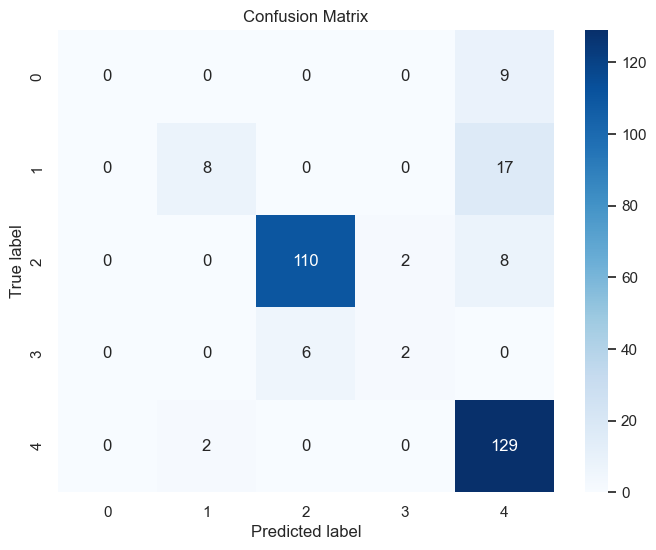

In [122]:
cm = confusion_matrix(y_test, DT_pred_test)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [123]:
# Generate classification report
report = classification_report(y_test, DT_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.80      0.32      0.46        25
           2       0.95      0.92      0.93       120
           3       0.50      0.25      0.33         8
           4       0.79      0.98      0.88       131

    accuracy                           0.85       293
   macro avg       0.61      0.49      0.52       293
weighted avg       0.82      0.85      0.82       293



In [ ]:
# RF Model:

In [116]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train, y_train)

RandomForestClassifier()

In [119]:
RF_pred_train = model_RF.predict(X_train)
RF_pred_test = model_RF.predict(X_test)

print(f'Accuracy Score on Train Data : {round(accuracy_score(y_train, pred_train),2)*100}')
print(f'Accuracy Score on Test Data : {round(accuracy_score(y_test, pred_test),2)*100}')

Accuracy Score on Train Data : 100.0
Accuracy Score on Test Data : 85.0


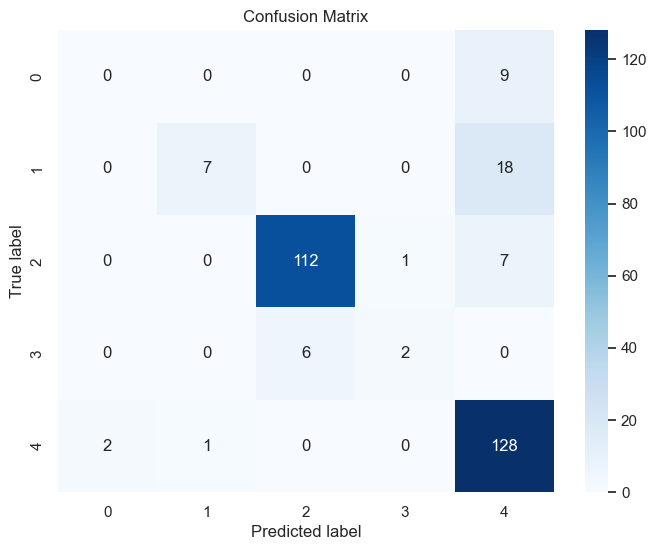

In [128]:
cm = confusion_matrix(y_test, RF_pred_test)

# Plot confusion matrix as heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [129]:
# Generate classification report
report = classification_report(y_test, RF_pred_test)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.88      0.28      0.42        25
           2       0.95      0.93      0.94       120
           3       0.67      0.25      0.36         8
           4       0.79      0.98      0.87       131

    accuracy                           0.85       293
   macro avg       0.66      0.49      0.52       293
weighted avg       0.83      0.85      0.82       293



<Axes: >

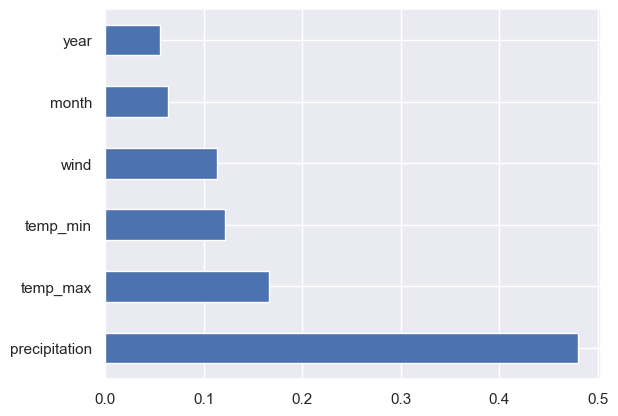

In [190]:
# Plot of importances
feat_importances = pd.Series(model_RF.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')